In [26]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Myriad Pro'
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

In [14]:
mask_2deg = np.loadtxt('mask_Gottlieb_2024_2deg.csv', delimiter=',', encoding='utf-8-sig')

In [15]:
mask = np.zeros((180, 360))
for ilat, ilon in mask_2deg:
    mask[int(ilat+89),int(ilon+179)] = 1
    mask[int(ilat+89),int(ilon+179)+1] = 1
    mask[int(ilat+89)+1,int(ilon+179)] = 1
    mask[int(ilat+89)+1,int(ilon+179)+1] = 1

mask = mask[-90:, :]
np.savetxt('mask_1deg.txt', mask)

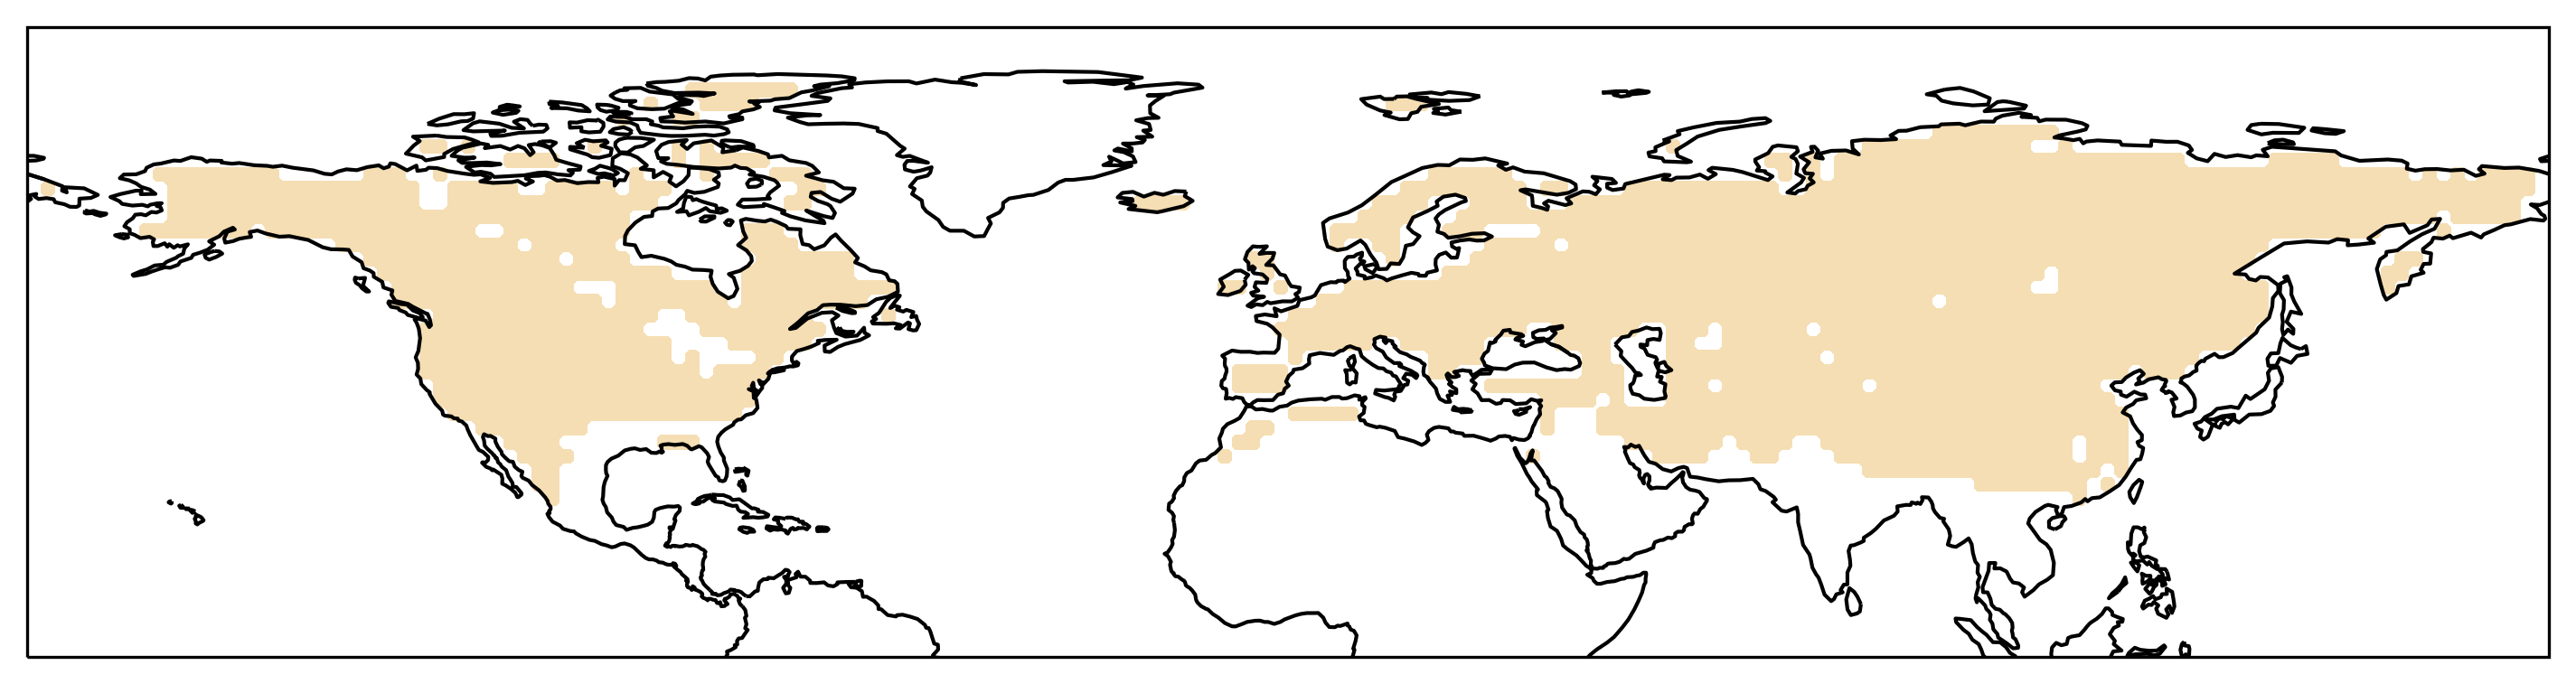

In [34]:
lon = np.linspace(-179.5, 179.5, 360) 
lat = np.linspace(0, 89.5, 90)
cmap = ListedColormap(['white', 'yellow', 'wheat'])
fig, ax = plt.subplots(figsize=(12,5), subplot_kw={'projection': ccrs.PlateCarree()})
# ax.add_feature(cfeature.OCEAN, zorder=100, edgecolor='k')
ax.coastlines()
basemap0 = ax.contourf(lon, lat, mask,levels=[-0.5, 0.5, 1.5], cmap = cmap, transform=ccrs.PlateCarree())
ax.set_extent([-180, 180, 0, 90], crs=ccrs.PlateCarree())

In [22]:
np.sum(mask[-5:, :])

0.0